In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned dataset
path = "/content/canada_hospital_inpatient_clean_1995_2024.csv"
df = pd.read_csv(path)

# Basic structure
eda_info = {
    "rows": len(df),
    "columns": list(df.columns),
    "years": df["Fiscal_Year"].nunique(),
    "provinces": df["Province_Territory"].nunique()
}

eda_info


{'rows': 24811,
 'columns': ['Fiscal_Year',
  'Province_Territory',
  'Age_Group',
  'Sex',
  'Number_of_Discharges',
  'Total_Length_of_Stay_Days',
  'Average_Length_of_Stay_Days'],
 'years': 29,
 'provinces': 14}

# **BASED ON FISCAL YEAR**

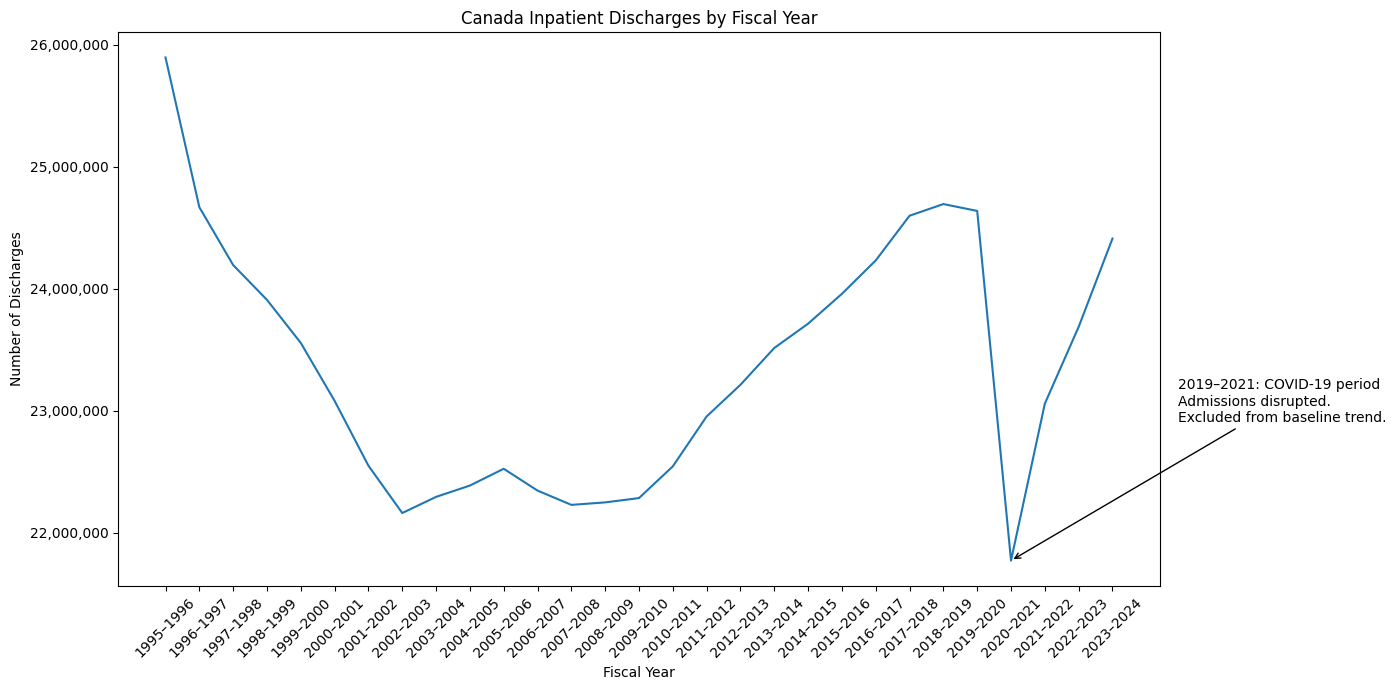

In [13]:
from matplotlib.ticker import StrMethodFormatter

# Aggregate to Canada-wide yearly discharges
yearly = (
    df.groupby("Fiscal_Year", as_index=False)["Number_of_Discharges"]
    .sum()
)

# plot
plt.figure(figsize=(14, 7))

plt.plot(yearly["Fiscal_Year"], yearly["Number_of_Discharges"])
plt.xticks(rotation=45)
plt.xlabel("Fiscal Year")
plt.ylabel("Number of Discharges")
plt.title("Canada Inpatient Discharges by Fiscal Year")

# Format y-axis to show full numbers
ax = plt.gca()
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))

# Add COVID-19 annotation
plt.annotate(
    "2019–2021: COVID-19 period\nAdmissions disrupted.\nExcluded from baseline trend.",
    xy=("2020–2021", yearly.loc[yearly["Fiscal_Year"] == "2020–2021", "Number_of_Discharges"].values[0]),
    xytext=(120, 100),
    textcoords="offset points",
    arrowprops=dict(arrowstyle="->"),
)

plt.tight_layout()
plt.show()

# **WHAT THE DATA SHOWS**

*   Hospital discharges were highest in the mid-1990s, at close to 26,000,000.
*   Volumes fell through the late 1990s and early 2000s.
*   From around 2010, discharges began to rise again.
*   A sudden drop appears in 2020 and 2021.
*   The recovery since then has not yet returned to earlier highs.

## How COVID-19 fits into this

In Canada, the COVID-19 pandemic affected hospital services between 2019 and 2021.

During this time, hospitals delayed planned care, followed emergency rules, and worked under tight capacity.

These conditions changed how often patients were admitted and discharged.
As a result, the figures from this period do not reflect normal demand.
The COVID-19 years are included to explain the disruption, not to define the baseline or guide the forecast.

# **BASED ON PROVINCE AND FISCAL YEAR**

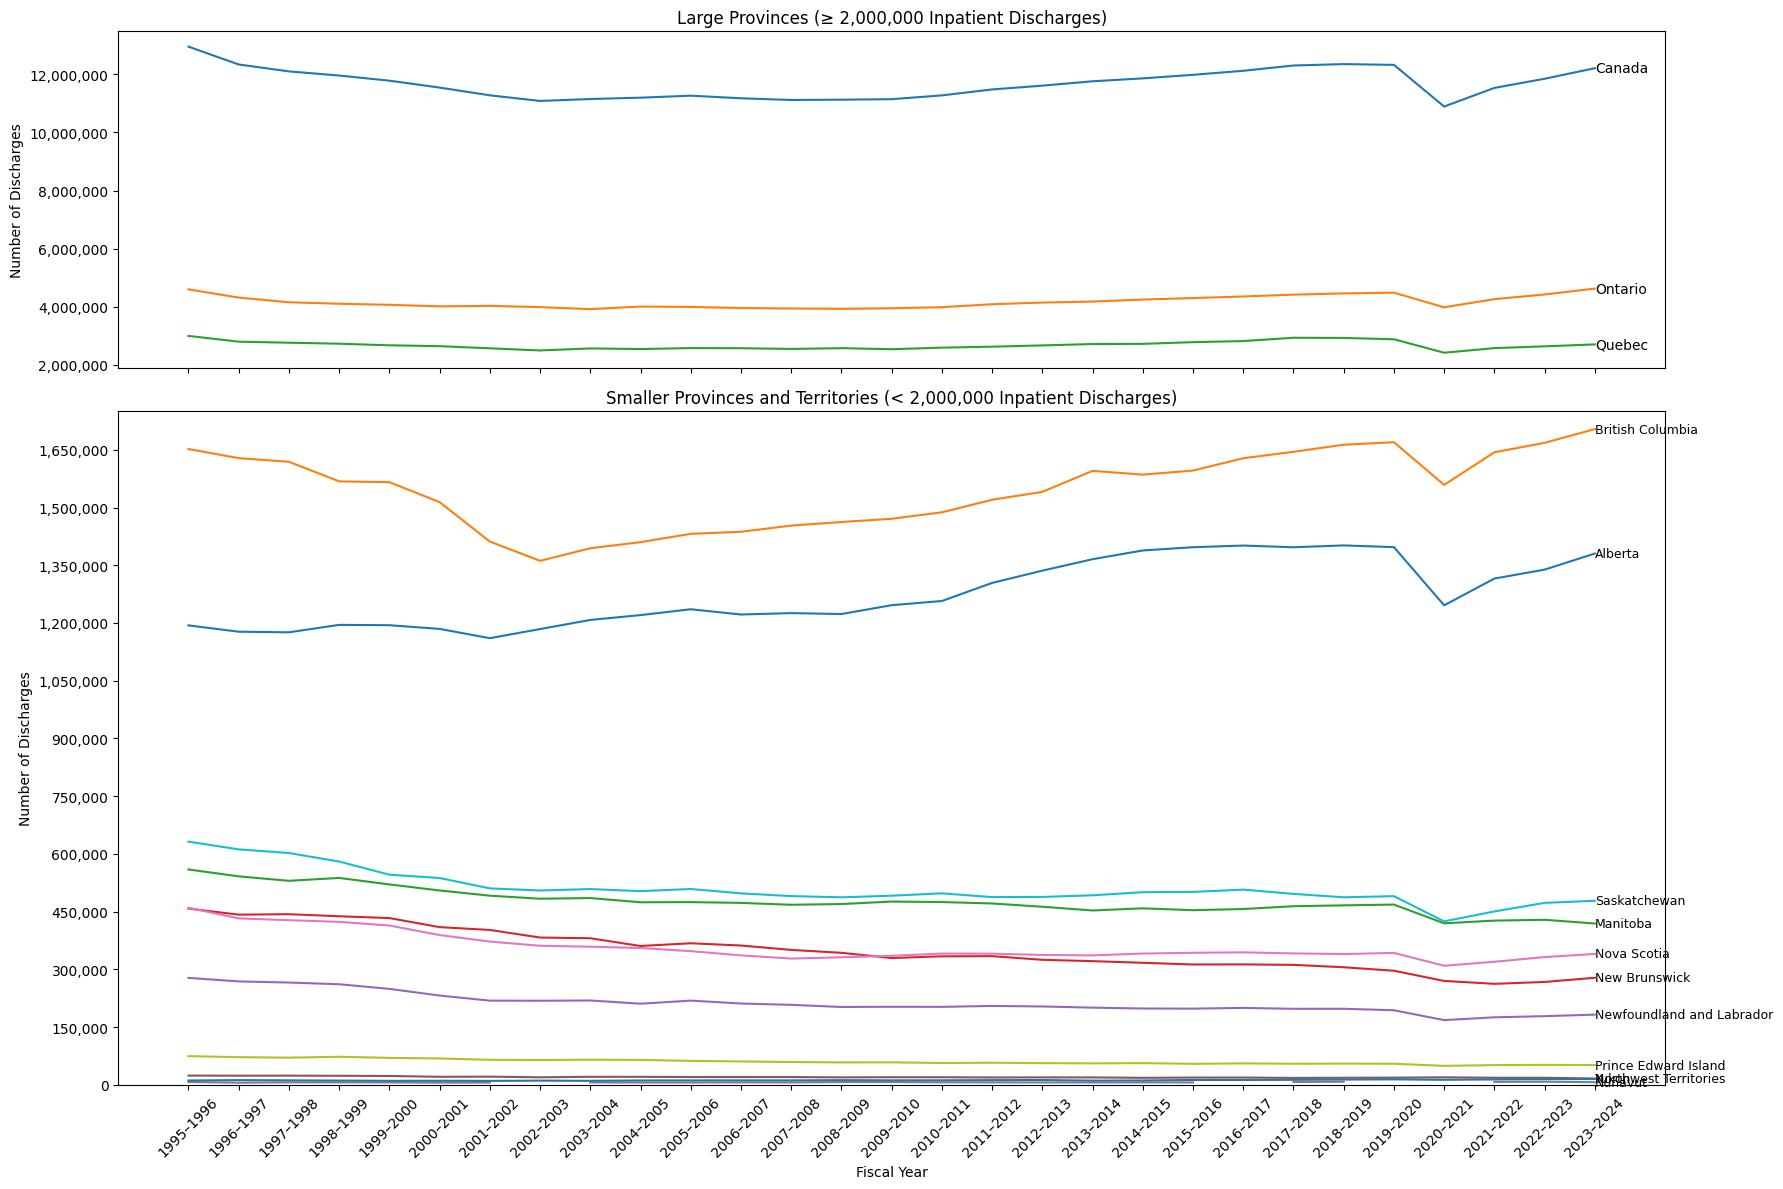

In [14]:
from matplotlib.ticker import MultipleLocator

# Aggregate to province-level yearly discharges
prov_yearly = (
    df.groupby(["Province_Territory", "Fiscal_Year"], as_index=False)["Number_of_Discharges"]
    .sum()
)

pivot = prov_yearly.pivot(
    index="Fiscal_Year",
    columns="Province_Territory",
    values="Number_of_Discharges"
)

# Split provinces by size
latest = pivot.iloc[-1]
large_prov = latest[latest >= 2_000_000].index
small_prov = latest[latest < 2_000_000].index

# Create stacked plots
fig, (ax_top, ax_bottom) = plt.subplots(
    2, 1,
    figsize=(18, 12),
    sharex=True,
    gridspec_kw={"height_ratios": [1, 2]}
)

last_year = pivot.index[-1]

# Top panel
for prov in large_prov:
    y = pivot[prov]
    ax_top.plot(pivot.index, y)
    ax_top.text(last_year, y.iloc[-1], prov, fontsize=10, va="center")

ax_top.set_title("Large Provinces (≥ 2,000,000 Inpatient Discharges)")
ax_top.set_ylabel("Number of Discharges")
ax_top.yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))

# Bottom panel
for prov in small_prov:
    y = pivot[prov]
    ax_bottom.plot(pivot.index, y)
    ax_bottom.text(last_year, y.iloc[-1], prov, fontsize=9, va="center")

ax_bottom.set_title("Smaller Provinces and Territories (< 2,000,000 Inpatient Discharges)")
ax_bottom.set_ylabel("Number of Discharges")
ax_bottom.set_xlabel("Fiscal Year")

ax_bottom.set_ylim(0, 1_750_000)
ax_bottom.yaxis.set_major_locator(MultipleLocator(150_000))
ax_bottom.yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Trend and interpretation**

#### Hospital inpatient discharges in Canada show long-term stability with gradual structural change over time.

####National demand is driven primarily by a small number of large provinces, with Ontario and Quebec accounting for the majority of inpatient activity.

####After a period of decline in the late 1990s and early 2000s, most provinces experience a sustained increase in discharges from around 2010 onward.

####The COVID-19 period produces a clear and simultaneous reduction in inpatient discharges across all provinces, indicating a system-wide disruption rather than local variation.

####Post-pandemic recovery is evident but uneven, with several provinces not yet returning to pre-pandemic levels.

####When smaller provinces are examined on an expanded scale, meaningful differences in growth, stability, and recovery patterns become visible, supporting the need for province-level analysis rather than reliance on national aggregates. ###